#Image Corpus Creation and Binary Classification using DNN

### Steps 1- Dataset Creation:

Our classification samples are

1. Peacock

2. White Peacock

In [ ]:
!pip install bing-image-downloader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir images

In [ ]:
from bing_image_downloader import downloader
downloader.download("peacock", limit=10,  output_dir='images', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)

[%] Downloading Images to /content/images/peacock


[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from http://ftexploring.com/~ftexplor/animals/peacock/peacock3 - 70b.jpg
[!] Issue getting: http://ftexploring.com/~ftexplor/animals/peacock/peacock3 - 70b.jpg
[!] Error:: URL can't contain control characters. '/~ftexplor/animals/peacock/peacock3 - 70b.jpg' (found at least ' ')
[%] Downloading Image #1 from https://wallpapershome.com/images/wallpapers/peacock-1080x1920-feathers-4747.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://farm8.staticflickr.com/7241/7004847680_f9077b667f_z.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://picturejournals.com/wp-content/uploads/2012/09/peacock-2-1024x682.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://www.pxleyes.com/images/contests/peacock/fullsize/peacock_4c04e3ceea27d_hires.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://upload.wikimedia.org/wikipe

In [ ]:
downloader.download("whitepeacock", limit=10,  output_dir='images', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)

[%] Downloading Images to /content/images/whitepeacock


[!!]Indexing page: 1

[%] Indexed 8 Images on Page 1.


[%] Downloading Image #1 from http://www.indiamike.com/files/images/27/56/09/dancing-white-peacock--once-more.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://usercontent1.hubstatic.com/14152116_f1024.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://1.bp.blogspot.com/-YZi85M2VnQk/U0GDyNs1-MI/AAAAAAAABKk/pFFN0RnVFWs/s1600/funadress+white+pec+3.JPG
[%] File Downloaded !

[%] Downloading Image #4 from https://cdn.pixabay.com/photo/2017/07/18/17/07/peahen-2516396_640.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://3.bp.blogspot.com/-08UebwaZqT0/Ub7Cr8spSTI/AAAAAAAADQ0/BZ30qeh98GU/s1600/White-Peacock.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://wallpapercave.com/wp/GSn6VaC.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://images.clipartpanda.com/peacock-clipart-yioo6jRiE.png
[%] File Downloaded !

[%]

### Steps 2- Pre-Processing:

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import time
from time import process_time 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import os

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense

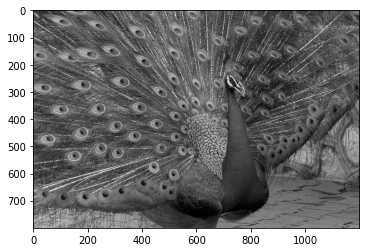

In [ ]:
datadir ="images"
categories =['peacock']

for category in categories:
    path = os.path.join(datadir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

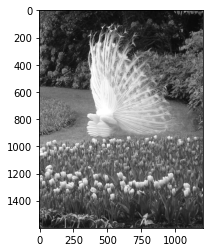

In [ ]:
datadir ="images"
categories =['whitepeacock']

for category in categories:
    path = os.path.join(datadir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [ ]:
datadir = "images"
categories = ['peacock', 'whitepeacock']

In [ ]:
data = []
img_size=500

def preprocess():
    for category in categories:
        path = os.path.join(datadir, category)
        class_num = categories.index(category)
        
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            num_array = cv2.resize(img_array,(img_size, img_size))
            
            data.append([num_array, class_num])
            
preprocess()

In [ ]:
print(len(data))

20


### Steps 3- Dataset Preparation:

In [ ]:
X = []
y = []

for features,label in data:
    X.append(features)
    y.append(label)

X = np.asarray(X).reshape(-1,img_size,img_size,1)
y = np.asarray(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print("Shape of the following:")
print("X_train =", X_train.shape, "\nX_test =", X_test.shape, "\ny_train =", y_train.shape, "\ny_test =", y_test.shape)

Shape of the following:
X_train = (15, 500, 500, 1) 
X_test = (5, 500, 500, 1) 
y_train = (15,) 
y_test = (5,)


### Step 4 - Model Creation:

In [ ]:
model = Sequential()
model.add(Dense(8, input_dim=1, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='mean_squared_error', metrics=['binary_accuracy'])

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.4881 - binary_accuracy: 0.4667 - val_loss: 0.3722 - val_binary_accuracy: 0.5999
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 0.4768 - binary_accuracy: 0.4678 - val_loss: 0.3631 - val_binary_accuracy: 0.5999
Epoch 3/100
1/1 [==============================] - 1s 1s/step - loss: 0.4630 - binary_accuracy: 0.4678 - val_loss: 0.3503 - val_binary_accuracy: 0.5999
Epoch 4/100
1/1 [==============================] - 1s 1s/step - loss: 0.4447 - binary_accuracy: 0.4678 - val_loss: 0.3300 - val_binary_accuracy: 0.5999
Epoch 5/100
1/1 [==============================] - 1s 1s/step - loss: 0.4174 - binary_accuracy: 0.4678 - val_loss: 0.2969 - val_binary_accuracy: 0.5996
Epoch 6/100
1/1 [==============================] - 1s 1s/step - loss: 0.3726 - binary_accuracy: 0.4681 - val_loss: 0.2525 - val_binary_accuracy: 0.5990
Epoch 7/100
1/1 [==============================] - 1s 1s/step - loss: 0.2992 - binary_ac

In [ ]:
model.evaluate(X_train, y_train)

1/1 [==============================] - 1s 1s/step - loss: 0.2515 - binary_accuracy: 0.4848


[0.25147557258605957, 0.4847829043865204]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 16        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


### Step 5 - Performance Analysis:

#### a. Single layer neural network Performance Analysis

In [ ]:
def performance_analysis(datadir, categories, img_size, nodes):
    
    df_results = pd.DataFrame(data=np.zeros(shape=(0, 5)), 
                              columns = ['Img size','Nodes Number','Accuracy','Loss','Training time'])
 
    training_data = []
    
    for category in categories:
        path = os.path.join(datadir,category)
        class_num = categories.index(category)
        
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            num_array=cv2.resize(img_array,(img_size,img_size))
            training_data.append([num_array,class_num])

    X=[]
    y=[]
    
    for features,label in training_data:
        X.append(features)
        y.append(label)
        
    X=np.asarray(X).reshape(-1,img_size,img_size,1)
    y=np.asarray(y)

    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42)

    count = 0
    t_start = process_time() 
    
    model = Sequential()
    model.add(Dense(nodes, input_dim=1, activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='mean_squared_error', metrics=['binary_accuracy'])
    model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10)
    
    t_stop = process_time() 
    t_elapsed = t_stop - t_start
    
    score = model.evaluate(X_test,y_test)
    
    count+=1

    df_results.loc[count,'Img size'] = img_size
    df_results.loc[count,'Nodes Number'] = nodes
    df_results.loc[count,'Accuracy'] = score[1]
    df_results.loc[count,'Loss'] = score[0]
    df_results.loc[count,'Training time'] = t_elapsed
        
    return df_results

In [ ]:
def evaluation():
    m1 = performance_analysis("images", ['peacock', 'whitepeacock'], 500, 8)
    m2 = performance_analysis("images", ['peacock', 'whitepeacock'], 500, 16)
    m3 = performance_analysis("images", ['peacock', 'whitepeacock'],500, 32)
    m4 = performance_analysis("images", ['peacock', 'whitepeacock'],500, 64)
    m5 = performance_analysis("images", ['peacock', 'whitepeacock'], 100, 8)
    m6 = performance_analysis("images", ['peacock', 'whitepeacock'],100, 16)
    m7 = performance_analysis("images", ['peacock', 'whitepeacock'], 100, 32)
    m8 = performance_analysis("images", ['peacock', 'whitepeacock'],100, 64)
    m9 = performance_analysis("images", ['peacock', 'whitepeacock'], 50, 8)
    m10 = performance_analysis("images", ['peacock', 'whitepeacock'],50, 16)
    m11 = performance_analysis("images", ['peacock', 'whitepeacock'],50, 32)
    m12 = performance_analysis("images", ['peacock', 'whitepeacock'], 50, 64)
    m13 = performance_analysis("images", ['peacock', 'whitepeacock'],25, 8)
    m14 = performance_analysis("images", ['peacock', 'whitepeacock'],25, 16)
    m15 = performance_analysis("images", ['peacock', 'whitepeacock'],25, 32)
    m16 = performance_analysis("images", ['peacock', 'whitepeacock'],25, 64)
    m17 = performance_analysis("images", ['peacock', 'whitepeacock'], 10, 8)
    m18 = performance_analysis("images", ['peacock', 'whitepeacock'],10, 16)
    m19 = performance_analysis("images", ['peacock', 'whitepeacock'], 10, 32)
    m20 = performance_analysis("images", ['peacock', 'whitepeacock'],10, 64)
    
    df = pd.concat([m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15,m16,m17,m18,m19,m20], axis=0)

    for i in range(1):
      return df 
    

In [ ]:
evaluation()

Epoch 1/10


1/1 [==============================] - ETA: 0s - loss: 0.5237 - binary_accuracy: 0.4667WARNING:tensorflow:Model was constructed with shape (None, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_2_input'), name='dense_2_input', description="created by layer 'dense_2_input'"), but it was called on an input with incompatible shape (None, 500, 500, 1).


1/1 [==============================] - 2s 2s/step - loss: 0.5237 - binary_accuracy: 0.4667 - val_loss: 0.3981 - val_binary_accuracy: 0.5999
Epoch 2/10
1/1 [==============================] - 1s 1s/step - loss: 0.5236 - binary_accuracy: 0.4678 - val_loss: 0.3981 - val_binary_accuracy: 0.5999
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 0.5235 - binary_accuracy: 0.4678 - val_loss: 0.3980 - val_binary_accuracy: 0.5999
Epoch 4/10
1/1 [==============================] - 1s 1s/step - loss: 0.5235 - binary_accuracy: 0.4678 - val_loss: 0.3980 - val_binary_accuracy: 0.5999
Epoch 5/10
1/1 [==============================] - 1s 1s/step - loss: 0.5234 - binary_accuracy: 0.4678 - val_loss: 0.3980 - val_binary_accuracy: 0.5999
Epoch 6/10
1/1 [==============================] - 1s 1s/step - loss: 0.5233 - binary_accuracy: 0.4678 - val_loss: 0.3979 - val_binary_accuracy: 0.5999
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 0.5233 - binary_accuracy: 0.4678 - v

1/1 [==============================] - ETA: 0s - loss: 0.5270 - binary_accuracy: 0.4667WARNING:tensorflow:Model was constructed with shape (None, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_4_input'), name='dense_4_input', description="created by layer 'dense_4_input'"), but it was called on an input with incompatible shape (None, 500, 500, 1).


1/1 [==============================] - 2s 2s/step - loss: 0.5270 - binary_accuracy: 0.4667 - val_loss: 0.3996 - val_binary_accuracy: 0.5999
Epoch 2/10
1/1 [==============================] - 1s 1s/step - loss: 0.5269 - binary_accuracy: 0.4678 - val_loss: 0.3996 - val_binary_accuracy: 0.5999
Epoch 3/10
1/1 [==============================] - 1s 1s/step - loss: 0.5269 - binary_accuracy: 0.4678 - val_loss: 0.3996 - val_binary_accuracy: 0.5999
Epoch 4/10
1/1 [==============================] - 1s 1s/step - loss: 0.5269 - binary_accuracy: 0.4678 - val_loss: 0.3996 - val_binary_accuracy: 0.5999
Epoch 5/10
1/1 [==============================] - 1s 1s/step - loss: 0.5268 - binary_accuracy: 0.4678 - val_loss: 0.3995 - val_binary_accuracy: 0.5999
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 0.5268 - binary_accuracy: 0.4678 - val_loss: 0.3995 - val_binary_accuracy: 0.5999
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 0.5268 - binary_accuracy: 0.4678 - v

1/1 [==============================] - ETA: 0s - loss: 0.4287 - binary_accuracy: 0.5322WARNING:tensorflow:Model was constructed with shape (None, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_6_input'), name='dense_6_input', description="created by layer 'dense_6_input'"), but it was called on an input with incompatible shape (None, 500, 500, 1).


1/1 [==============================] - 3s 3s/step - loss: 0.4287 - binary_accuracy: 0.5322 - val_loss: 0.5319 - val_binary_accuracy: 0.4001
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 0.4042 - binary_accuracy: 0.5322 - val_loss: 0.4335 - val_binary_accuracy: 0.4004
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 0.3426 - binary_accuracy: 0.5319 - val_loss: 0.2422 - val_binary_accuracy: 0.6000
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: 0.2694 - binary_accuracy: 0.4667 - val_loss: 0.4117 - val_binary_accuracy: 0.4004
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 0.3298 - binary_accuracy: 0.5319 - val_loss: 0.2701 - val_binary_accuracy: 0.4036
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 0.2524 - binary_accuracy: 0.5304 - val_loss: 0.2424 - val_binary_accuracy: 0.6000
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 0.2707 - binary_accuracy: 0.4667 - v

1/1 [==============================] - ETA: 0s - loss: 0.4852 - binary_accuracy: 0.4667WARNING:tensorflow:Model was constructed with shape (None, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_8_input'), name='dense_8_input', description="created by layer 'dense_8_input'"), but it was called on an input with incompatible shape (None, 500, 500, 1).


1/1 [==============================] - 4s 4s/step - loss: 0.4852 - binary_accuracy: 0.4667 - val_loss: 0.3553 - val_binary_accuracy: 0.5999
Epoch 2/10
1/1 [==============================] - 3s 3s/step - loss: 0.4518 - binary_accuracy: 0.4678 - val_loss: 0.2880 - val_binary_accuracy: 0.5996
Epoch 3/10
1/1 [==============================] - 3s 3s/step - loss: 0.3598 - binary_accuracy: 0.4681 - val_loss: 0.3240 - val_binary_accuracy: 0.4000
Epoch 4/10
1/1 [==============================] - 3s 3s/step - loss: 0.2779 - binary_accuracy: 0.5333 - val_loss: 0.2568 - val_binary_accuracy: 0.5992
Epoch 5/10
1/1 [==============================] - 3s 3s/step - loss: 0.3081 - binary_accuracy: 0.4685 - val_loss: 0.3254 - val_binary_accuracy: 0.4000
Epoch 6/10
1/1 [==============================] - 3s 3s/step - loss: 0.2787 - binary_accuracy: 0.5333 - val_loss: 0.2425 - val_binary_accuracy: 0.5970
Epoch 7/10
1/1 [==============================] - 3s 3s/step - loss: 0.2656 - binary_accuracy: 0.4695 - v

1/1 [==============================] - ETA: 0s - loss: 0.4605 - binary_accuracy: 0.5322WARNING:tensorflow:Model was constructed with shape (None, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_10_input'), name='dense_10_input', description="created by layer 'dense_10_input'"), but it was called on an input with incompatible shape (None, 100, 100, 1).


1/1 [==============================] - 1s 777ms/step - loss: 0.4605 - binary_accuracy: 0.5322 - val_loss: 0.5984 - val_binary_accuracy: 0.4001
Epoch 2/10
1/1 [==============================] - 0s 71ms/step - loss: 0.4605 - binary_accuracy: 0.5322 - val_loss: 0.5984 - val_binary_accuracy: 0.4001
Epoch 3/10
1/1 [==============================] - 0s 72ms/step - loss: 0.4605 - binary_accuracy: 0.5322 - val_loss: 0.5984 - val_binary_accuracy: 0.4001
Epoch 4/10
1/1 [==============================] - 0s 71ms/step - loss: 0.4604 - binary_accuracy: 0.5322 - val_loss: 0.5983 - val_binary_accuracy: 0.4001
Epoch 5/10
1/1 [==============================] - 0s 85ms/step - loss: 0.4604 - binary_accuracy: 0.5322 - val_loss: 0.5983 - val_binary_accuracy: 0.4001
Epoch 6/10
1/1 [==============================] - 0s 72ms/step - loss: 0.4604 - binary_accuracy: 0.5322 - val_loss: 0.5983 - val_binary_accuracy: 0.4001
Epoch 7/10
1/1 [==============================] - 0s 72ms/step - loss: 0.4603 - binary_accur

1/1 [==============================] - ETA: 0s - loss: 0.5218 - binary_accuracy: 0.4667WARNING:tensorflow:Model was constructed with shape (None, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_12_input'), name='dense_12_input', description="created by layer 'dense_12_input'"), but it was called on an input with incompatible shape (None, 100, 100, 1).


1/1 [==============================] - 1s 806ms/step - loss: 0.5218 - binary_accuracy: 0.4667 - val_loss: 0.3967 - val_binary_accuracy: 0.5999
Epoch 2/10
1/1 [==============================] - 0s 84ms/step - loss: 0.5212 - binary_accuracy: 0.4678 - val_loss: 0.3963 - val_binary_accuracy: 0.5999
Epoch 3/10
1/1 [==============================] - 0s 81ms/step - loss: 0.5206 - binary_accuracy: 0.4678 - val_loss: 0.3960 - val_binary_accuracy: 0.5999
Epoch 4/10
1/1 [==============================] - 0s 87ms/step - loss: 0.5200 - binary_accuracy: 0.4678 - val_loss: 0.3957 - val_binary_accuracy: 0.5999
Epoch 5/10
1/1 [==============================] - 0s 81ms/step - loss: 0.5193 - binary_accuracy: 0.4678 - val_loss: 0.3953 - val_binary_accuracy: 0.5999
Epoch 6/10
1/1 [==============================] - 0s 82ms/step - loss: 0.5187 - binary_accuracy: 0.4678 - val_loss: 0.3949 - val_binary_accuracy: 0.5999
Epoch 7/10
1/1 [==============================] - 0s 81ms/step - loss: 0.5179 - binary_accur

1/1 [==============================] - ETA: 0s - loss: 0.4586 - binary_accuracy: 0.5322WARNING:tensorflow:Model was constructed with shape (None, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_14_input'), name='dense_14_input', description="created by layer 'dense_14_input'"), but it was called on an input with incompatible shape (None, 100, 100, 1).


1/1 [==============================] - 1s 799ms/step - loss: 0.4586 - binary_accuracy: 0.5322 - val_loss: 0.5958 - val_binary_accuracy: 0.4001
Epoch 2/10
1/1 [==============================] - 0s 97ms/step - loss: 0.4581 - binary_accuracy: 0.5322 - val_loss: 0.5952 - val_binary_accuracy: 0.4001
Epoch 3/10
1/1 [==============================] - 0s 100ms/step - loss: 0.4576 - binary_accuracy: 0.5322 - val_loss: 0.5946 - val_binary_accuracy: 0.4001
Epoch 4/10
1/1 [==============================] - 0s 109ms/step - loss: 0.4570 - binary_accuracy: 0.5322 - val_loss: 0.5939 - val_binary_accuracy: 0.4001
Epoch 5/10
1/1 [==============================] - 0s 97ms/step - loss: 0.4564 - binary_accuracy: 0.5322 - val_loss: 0.5930 - val_binary_accuracy: 0.4001
Epoch 6/10
1/1 [==============================] - 0s 107ms/step - loss: 0.4556 - binary_accuracy: 0.5322 - val_loss: 0.5919 - val_binary_accuracy: 0.4001
Epoch 7/10
1/1 [==============================] - 0s 100ms/step - loss: 0.4547 - binary_a

1/1 [==============================] - ETA: 0s - loss: 0.5145 - binary_accuracy: 0.4667WARNING:tensorflow:Model was constructed with shape (None, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_16_input'), name='dense_16_input', description="created by layer 'dense_16_input'"), but it was called on an input with incompatible shape (None, 100, 100, 1).


1/1 [==============================] - 1s 853ms/step - loss: 0.5145 - binary_accuracy: 0.4667 - val_loss: 0.3895 - val_binary_accuracy: 0.5999
Epoch 2/10
1/1 [==============================] - 0s 131ms/step - loss: 0.5073 - binary_accuracy: 0.4678 - val_loss: 0.3824 - val_binary_accuracy: 0.5999
Epoch 3/10
1/1 [==============================] - 0s 133ms/step - loss: 0.4938 - binary_accuracy: 0.4678 - val_loss: 0.3596 - val_binary_accuracy: 0.5997
Epoch 4/10
1/1 [==============================] - 0s 139ms/step - loss: 0.4576 - binary_accuracy: 0.4681 - val_loss: 0.2466 - val_binary_accuracy: 0.5952
Epoch 5/10
1/1 [==============================] - 0s 135ms/step - loss: 0.2832 - binary_accuracy: 0.4700 - val_loss: 0.5032 - val_binary_accuracy: 0.4000
Epoch 6/10
1/1 [==============================] - 0s 128ms/step - loss: 0.3853 - binary_accuracy: 0.5333 - val_loss: 0.4421 - val_binary_accuracy: 0.4000
Epoch 7/10
1/1 [==============================] - 0s 131ms/step - loss: 0.3477 - binary

1/1 [==============================] - ETA: 0s - loss: 0.4609 - binary_accuracy: 0.5322WARNING:tensorflow:Model was constructed with shape (None, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_18_input'), name='dense_18_input', description="created by layer 'dense_18_input'"), but it was called on an input with incompatible shape (None, 50, 50, 1).


1/1 [==============================] - 1s 1s/step - loss: 0.4609 - binary_accuracy: 0.5322 - val_loss: 0.5990 - val_binary_accuracy: 0.4001
Epoch 2/10
1/1 [==============================] - 0s 45ms/step - loss: 0.4609 - binary_accuracy: 0.5322 - val_loss: 0.5990 - val_binary_accuracy: 0.4001
Epoch 3/10
1/1 [==============================] - 0s 40ms/step - loss: 0.4609 - binary_accuracy: 0.5322 - val_loss: 0.5989 - val_binary_accuracy: 0.4001
Epoch 4/10
1/1 [==============================] - 0s 51ms/step - loss: 0.4608 - binary_accuracy: 0.5322 - val_loss: 0.5989 - val_binary_accuracy: 0.4001
Epoch 5/10
1/1 [==============================] - 0s 41ms/step - loss: 0.4608 - binary_accuracy: 0.5322 - val_loss: 0.5989 - val_binary_accuracy: 0.4001
Epoch 6/10
1/1 [==============================] - 0s 43ms/step - loss: 0.4608 - binary_accuracy: 0.5322 - val_loss: 0.5989 - val_binary_accuracy: 0.4001
Epoch 7/10
1/1 [==============================] - 0s 44ms/step - loss: 0.4608 - binary_accuracy

1/1 [==============================] - ETA: 0s - loss: 0.5252 - binary_accuracy: 0.4667WARNING:tensorflow:Model was constructed with shape (None, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_20_input'), name='dense_20_input', description="created by layer 'dense_20_input'"), but it was called on an input with incompatible shape (None, 50, 50, 1).


1/1 [==============================] - 1s 758ms/step - loss: 0.5252 - binary_accuracy: 0.4667 - val_loss: 0.3990 - val_binary_accuracy: 0.5999
Epoch 2/10
1/1 [==============================] - 0s 45ms/step - loss: 0.5251 - binary_accuracy: 0.4678 - val_loss: 0.3990 - val_binary_accuracy: 0.5999
Epoch 3/10
1/1 [==============================] - 0s 41ms/step - loss: 0.5250 - binary_accuracy: 0.4678 - val_loss: 0.3990 - val_binary_accuracy: 0.5999
Epoch 4/10
1/1 [==============================] - 0s 55ms/step - loss: 0.5249 - binary_accuracy: 0.4678 - val_loss: 0.3989 - val_binary_accuracy: 0.5999
Epoch 5/10
1/1 [==============================] - 0s 50ms/step - loss: 0.5249 - binary_accuracy: 0.4678 - val_loss: 0.3989 - val_binary_accuracy: 0.5999
Epoch 6/10
1/1 [==============================] - 0s 46ms/step - loss: 0.5248 - binary_accuracy: 0.4678 - val_loss: 0.3989 - val_binary_accuracy: 0.5999
Epoch 7/10
1/1 [==============================] - 0s 48ms/step - loss: 0.5248 - binary_accur

1/1 [==============================] - ETA: 0s - loss: 0.5150 - binary_accuracy: 0.4667WARNING:tensorflow:Model was constructed with shape (None, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_22_input'), name='dense_22_input', description="created by layer 'dense_22_input'"), but it was called on an input with incompatible shape (None, 50, 50, 1).


1/1 [==============================] - 1s 1s/step - loss: 0.5150 - binary_accuracy: 0.4667 - val_loss: 0.3919 - val_binary_accuracy: 0.5999
Epoch 2/10
1/1 [==============================] - 0s 49ms/step - loss: 0.5111 - binary_accuracy: 0.4678 - val_loss: 0.3893 - val_binary_accuracy: 0.5999
Epoch 3/10
1/1 [==============================] - 0s 51ms/step - loss: 0.5059 - binary_accuracy: 0.4678 - val_loss: 0.3854 - val_binary_accuracy: 0.5999
Epoch 4/10
1/1 [==============================] - 0s 51ms/step - loss: 0.4980 - binary_accuracy: 0.4678 - val_loss: 0.3779 - val_binary_accuracy: 0.5999
Epoch 5/10
1/1 [==============================] - 0s 49ms/step - loss: 0.4847 - binary_accuracy: 0.4678 - val_loss: 0.3600 - val_binary_accuracy: 0.5998
Epoch 6/10
1/1 [==============================] - 0s 53ms/step - loss: 0.4572 - binary_accuracy: 0.4681 - val_loss: 0.3029 - val_binary_accuracy: 0.5992
Epoch 7/10
1/1 [==============================] - 0s 53ms/step - loss: 0.3806 - binary_accuracy

1/1 [==============================] - ETA: 0s - loss: 0.4553 - binary_accuracy: 0.5322WARNING:tensorflow:Model was constructed with shape (None, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_24_input'), name='dense_24_input', description="created by layer 'dense_24_input'"), but it was called on an input with incompatible shape (None, 50, 50, 1).


1/1 [==============================] - 1s 783ms/step - loss: 0.4553 - binary_accuracy: 0.5322 - val_loss: 0.5907 - val_binary_accuracy: 0.4001
Epoch 2/10
1/1 [==============================] - 0s 57ms/step - loss: 0.4527 - binary_accuracy: 0.5322 - val_loss: 0.5870 - val_binary_accuracy: 0.4001
Epoch 3/10
1/1 [==============================] - 0s 57ms/step - loss: 0.4490 - binary_accuracy: 0.5322 - val_loss: 0.5807 - val_binary_accuracy: 0.4001
Epoch 4/10
1/1 [==============================] - 0s 63ms/step - loss: 0.4427 - binary_accuracy: 0.5322 - val_loss: 0.5667 - val_binary_accuracy: 0.4002
Epoch 5/10
1/1 [==============================] - 0s 56ms/step - loss: 0.4298 - binary_accuracy: 0.5319 - val_loss: 0.5156 - val_binary_accuracy: 0.4004
Epoch 6/10
1/1 [==============================] - 0s 59ms/step - loss: 0.3922 - binary_accuracy: 0.5317 - val_loss: 0.2468 - val_binary_accuracy: 0.6000
Epoch 7/10
1/1 [==============================] - 0s 59ms/step - loss: 0.2515 - binary_accur

1/1 [==============================] - ETA: 0s - loss: 0.4612 - binary_accuracy: 0.5321WARNING:tensorflow:Model was constructed with shape (None, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_26_input'), name='dense_26_input', description="created by layer 'dense_26_input'"), but it was called on an input with incompatible shape (None, 25, 25, 1).


1/1 [==============================] - 1s 775ms/step - loss: 0.4612 - binary_accuracy: 0.5321 - val_loss: 0.5996 - val_binary_accuracy: 0.4001
Epoch 2/10
1/1 [==============================] - 0s 37ms/step - loss: 0.4612 - binary_accuracy: 0.5321 - val_loss: 0.5996 - val_binary_accuracy: 0.4001
Epoch 3/10
1/1 [==============================] - 0s 36ms/step - loss: 0.4612 - binary_accuracy: 0.5321 - val_loss: 0.5996 - val_binary_accuracy: 0.4001
Epoch 4/10
1/1 [==============================] - 0s 40ms/step - loss: 0.4611 - binary_accuracy: 0.5321 - val_loss: 0.5996 - val_binary_accuracy: 0.4001
Epoch 5/10
1/1 [==============================] - 0s 52ms/step - loss: 0.4611 - binary_accuracy: 0.5321 - val_loss: 0.5996 - val_binary_accuracy: 0.4001
Epoch 6/10
1/1 [==============================] - 0s 42ms/step - loss: 0.4611 - binary_accuracy: 0.5321 - val_loss: 0.5996 - val_binary_accuracy: 0.4001
Epoch 7/10
1/1 [==============================] - 0s 35ms/step - loss: 0.4611 - binary_accur

1/1 [==============================] - ETA: 0s - loss: 0.5250 - binary_accuracy: 0.4667WARNING:tensorflow:Model was constructed with shape (None, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_28_input'), name='dense_28_input', description="created by layer 'dense_28_input'"), but it was called on an input with incompatible shape (None, 25, 25, 1).


1/1 [==============================] - 1s 774ms/step - loss: 0.5250 - binary_accuracy: 0.4667 - val_loss: 0.3994 - val_binary_accuracy: 0.5999
Epoch 2/10
1/1 [==============================] - 0s 43ms/step - loss: 0.5249 - binary_accuracy: 0.4679 - val_loss: 0.3994 - val_binary_accuracy: 0.5999
Epoch 3/10
1/1 [==============================] - 0s 47ms/step - loss: 0.5248 - binary_accuracy: 0.4679 - val_loss: 0.3993 - val_binary_accuracy: 0.5999
Epoch 4/10
1/1 [==============================] - 0s 38ms/step - loss: 0.5247 - binary_accuracy: 0.4679 - val_loss: 0.3993 - val_binary_accuracy: 0.5999
Epoch 5/10
1/1 [==============================] - 0s 34ms/step - loss: 0.5247 - binary_accuracy: 0.4679 - val_loss: 0.3993 - val_binary_accuracy: 0.5999
Epoch 6/10
1/1 [==============================] - 0s 42ms/step - loss: 0.5246 - binary_accuracy: 0.4679 - val_loss: 0.3993 - val_binary_accuracy: 0.5999
Epoch 7/10
1/1 [==============================] - 0s 55ms/step - loss: 0.5246 - binary_accur

1/1 [==============================] - ETA: 0s - loss: 0.4577 - binary_accuracy: 0.5321WARNING:tensorflow:Model was constructed with shape (None, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_30_input'), name='dense_30_input', description="created by layer 'dense_30_input'"), but it was called on an input with incompatible shape (None, 25, 25, 1).


1/1 [==============================] - 1s 771ms/step - loss: 0.4577 - binary_accuracy: 0.5321 - val_loss: 0.5963 - val_binary_accuracy: 0.4001
Epoch 2/10
1/1 [==============================] - 0s 44ms/step - loss: 0.4572 - binary_accuracy: 0.5321 - val_loss: 0.5958 - val_binary_accuracy: 0.4001
Epoch 3/10
1/1 [==============================] - 0s 40ms/step - loss: 0.4568 - binary_accuracy: 0.5321 - val_loss: 0.5953 - val_binary_accuracy: 0.4001
Epoch 4/10
1/1 [==============================] - 0s 38ms/step - loss: 0.4563 - binary_accuracy: 0.5321 - val_loss: 0.5947 - val_binary_accuracy: 0.4001
Epoch 5/10
1/1 [==============================] - 0s 37ms/step - loss: 0.4558 - binary_accuracy: 0.5321 - val_loss: 0.5941 - val_binary_accuracy: 0.4001
Epoch 6/10
1/1 [==============================] - 0s 44ms/step - loss: 0.4553 - binary_accuracy: 0.5321 - val_loss: 0.5934 - val_binary_accuracy: 0.4001
Epoch 7/10
1/1 [==============================] - 0s 40ms/step - loss: 0.4546 - binary_accur

1/1 [==============================] - ETA: 0s - loss: 0.4408 - binary_accuracy: 0.5321WARNING:tensorflow:Model was constructed with shape (None, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_32_input'), name='dense_32_input', description="created by layer 'dense_32_input'"), but it was called on an input with incompatible shape (None, 25, 25, 1).


1/1 [==============================] - 1s 769ms/step - loss: 0.4408 - binary_accuracy: 0.5321 - val_loss: 0.5569 - val_binary_accuracy: 0.4001
Epoch 2/10
1/1 [==============================] - 0s 38ms/step - loss: 0.4216 - binary_accuracy: 0.5321 - val_loss: 0.4570 - val_binary_accuracy: 0.4001
Epoch 3/10
1/1 [==============================] - 0s 36ms/step - loss: 0.3560 - binary_accuracy: 0.5319 - val_loss: 0.2807 - val_binary_accuracy: 0.6000
Epoch 4/10
1/1 [==============================] - 0s 41ms/step - loss: 0.3499 - binary_accuracy: 0.4667 - val_loss: 0.4372 - val_binary_accuracy: 0.4002
Epoch 5/10
1/1 [==============================] - 0s 56ms/step - loss: 0.3443 - binary_accuracy: 0.5316 - val_loss: 0.2593 - val_binary_accuracy: 0.4135
Epoch 6/10
1/1 [==============================] - 0s 43ms/step - loss: 0.2498 - binary_accuracy: 0.5256 - val_loss: 0.2420 - val_binary_accuracy: 0.6000
Epoch 7/10
1/1 [==============================] - 0s 38ms/step - loss: 0.2594 - binary_accur

1/1 [==============================] - ETA: 0s - loss: 0.4597 - binary_accuracy: 0.5325WARNING:tensorflow:Model was constructed with shape (None, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_34_input'), name='dense_34_input', description="created by layer 'dense_34_input'"), but it was called on an input with incompatible shape (None, 10, 10, 1).


1/1 [==============================] - 1s 773ms/step - loss: 0.4597 - binary_accuracy: 0.5325 - val_loss: 0.5967 - val_binary_accuracy: 0.4000
Epoch 2/10
1/1 [==============================] - 0s 36ms/step - loss: 0.4595 - binary_accuracy: 0.5325 - val_loss: 0.5965 - val_binary_accuracy: 0.4000
Epoch 3/10
1/1 [==============================] - 0s 34ms/step - loss: 0.4593 - binary_accuracy: 0.5325 - val_loss: 0.5963 - val_binary_accuracy: 0.4000
Epoch 4/10
1/1 [==============================] - 0s 34ms/step - loss: 0.4591 - binary_accuracy: 0.5325 - val_loss: 0.5961 - val_binary_accuracy: 0.4000
Epoch 5/10
1/1 [==============================] - 0s 33ms/step - loss: 0.4589 - binary_accuracy: 0.5325 - val_loss: 0.5958 - val_binary_accuracy: 0.4000
Epoch 6/10
1/1 [==============================] - 0s 32ms/step - loss: 0.4588 - binary_accuracy: 0.5325 - val_loss: 0.5956 - val_binary_accuracy: 0.4000
Epoch 7/10
1/1 [==============================] - 0s 33ms/step - loss: 0.4586 - binary_accur

1/1 [==============================] - ETA: 0s - loss: 0.5168 - binary_accuracy: 0.4667WARNING:tensorflow:Model was constructed with shape (None, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_36_input'), name='dense_36_input', description="created by layer 'dense_36_input'"), but it was called on an input with incompatible shape (None, 10, 10, 1).


1/1 [==============================] - 1s 752ms/step - loss: 0.5168 - binary_accuracy: 0.4667 - val_loss: 0.3922 - val_binary_accuracy: 0.6000
Epoch 2/10
1/1 [==============================] - 0s 37ms/step - loss: 0.5125 - binary_accuracy: 0.4675 - val_loss: 0.3894 - val_binary_accuracy: 0.6000
Epoch 3/10
1/1 [==============================] - 0s 36ms/step - loss: 0.5062 - binary_accuracy: 0.4675 - val_loss: 0.3843 - val_binary_accuracy: 0.6000
Epoch 4/10
1/1 [==============================] - 0s 34ms/step - loss: 0.4956 - binary_accuracy: 0.4675 - val_loss: 0.3722 - val_binary_accuracy: 0.6000
Epoch 5/10
1/1 [==============================] - 0s 37ms/step - loss: 0.4740 - binary_accuracy: 0.4678 - val_loss: 0.3301 - val_binary_accuracy: 0.6000
Epoch 6/10
1/1 [==============================] - 0s 35ms/step - loss: 0.4148 - binary_accuracy: 0.4681 - val_loss: 0.2626 - val_binary_accuracy: 0.4000
Epoch 7/10
1/1 [==============================] - 0s 36ms/step - loss: 0.2495 - binary_accur

1/1 [==============================] - ETA: 0s - loss: 0.5269 - binary_accuracy: 0.4667WARNING:tensorflow:Model was constructed with shape (None, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_38_input'), name='dense_38_input', description="created by layer 'dense_38_input'"), but it was called on an input with incompatible shape (None, 10, 10, 1).


1/1 [==============================] - 1s 771ms/step - loss: 0.5269 - binary_accuracy: 0.4667 - val_loss: 0.3995 - val_binary_accuracy: 0.6000
Epoch 2/10
1/1 [==============================] - 0s 31ms/step - loss: 0.5268 - binary_accuracy: 0.4675 - val_loss: 0.3994 - val_binary_accuracy: 0.6000
Epoch 3/10
1/1 [==============================] - 0s 33ms/step - loss: 0.5267 - binary_accuracy: 0.4675 - val_loss: 0.3994 - val_binary_accuracy: 0.6000
Epoch 4/10
1/1 [==============================] - 0s 40ms/step - loss: 0.5267 - binary_accuracy: 0.4675 - val_loss: 0.3994 - val_binary_accuracy: 0.6000
Epoch 5/10
1/1 [==============================] - 0s 34ms/step - loss: 0.5266 - binary_accuracy: 0.4675 - val_loss: 0.3993 - val_binary_accuracy: 0.6000
Epoch 6/10
1/1 [==============================] - 0s 34ms/step - loss: 0.5265 - binary_accuracy: 0.4675 - val_loss: 0.3993 - val_binary_accuracy: 0.6000
Epoch 7/10
1/1 [==============================] - 0s 37ms/step - loss: 0.5265 - binary_accur

1/1 [==============================] - ETA: 0s - loss: 0.4583 - binary_accuracy: 0.5325WARNING:tensorflow:Model was constructed with shape (None, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_40_input'), name='dense_40_input', description="created by layer 'dense_40_input'"), but it was called on an input with incompatible shape (None, 10, 10, 1).


1/1 [==============================] - 1s 737ms/step - loss: 0.4583 - binary_accuracy: 0.5325 - val_loss: 0.5938 - val_binary_accuracy: 0.4000
Epoch 2/10
1/1 [==============================] - 0s 41ms/step - loss: 0.4569 - binary_accuracy: 0.5325 - val_loss: 0.5918 - val_binary_accuracy: 0.4000
Epoch 3/10
1/1 [==============================] - 0s 32ms/step - loss: 0.4550 - binary_accuracy: 0.5325 - val_loss: 0.5890 - val_binary_accuracy: 0.4000
Epoch 4/10
1/1 [==============================] - 0s 32ms/step - loss: 0.4520 - binary_accuracy: 0.5325 - val_loss: 0.5839 - val_binary_accuracy: 0.4000
Epoch 5/10
1/1 [==============================] - 0s 37ms/step - loss: 0.4464 - binary_accuracy: 0.5325 - val_loss: 0.5721 - val_binary_accuracy: 0.4000
Epoch 6/10
1/1 [==============================] - 0s 37ms/step - loss: 0.4340 - binary_accuracy: 0.5322 - val_loss: 0.5228 - val_binary_accuracy: 0.4004
Epoch 7/10
1/1 [==============================] - 0s 38ms/step - loss: 0.3953 - binary_accur

,Img size,Nodes Number,Accuracy,Loss,Training time
1,500.0,8.0,0.599858,0.397790,19.650902
1,500.0,16.0,0.599858,0.399520,22.699632
1,500.0,32.0,0.599999,0.242472,29.198589
1,500.0,64.0,0.595008,0.242673,42.093062
1,100.0,8.0,0.400109,0.598186,1.887751
1,100.0,16.0,0.599891,0.392706,2.038220
1,100.0,32.0,0.400109,0.583867,2.211783
1,100.0,64.0,0.599063,0.292958,2.771289
1,50.0,8.0,0.400065,0.598817,1.634735
1,50.0,16.0,0.599935,0.398800,1.365255


#### b. Multi layer neural network Performance Analysis

In [ ]:
#2 layer

training_data = []
img_size=500

def create_training_data():
    for category in categories:
        path = os.path.join(datadir,category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            num_array=cv2.resize(img_array,(img_size,img_size))
            training_data.append([num_array,class_num])
create_training_data()


x=[]
y=[]
for features,label in training_data:
    x.append(features)
    y.append(label)
x=np.asarray(x).reshape(-1,img_size,img_size,1)
y=np.asarray(y)


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)

model =Sequential()
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=10,verbose=2)


Epoch 1/10


2/2 - 4s - loss: 0.5137 - binary_accuracy: 0.4679 - val_loss: 0.3903 - val_binary_accuracy: 0.5999 - 4s/epoch - 2s/step
Epoch 2/10
2/2 - 3s - loss: 0.5080 - binary_accuracy: 0.4732 - val_loss: 0.3854 - val_binary_accuracy: 0.5999 - 3s/epoch - 1s/step
Epoch 3/10
2/2 - 3s - loss: 0.4987 - binary_accuracy: 0.4657 - val_loss: 0.3739 - val_binary_accuracy: 0.5999 - 3s/epoch - 1s/step
Epoch 4/10
2/2 - 3s - loss: 0.4776 - binary_accuracy: 0.4679 - val_loss: 0.3379 - val_binary_accuracy: 0.5996 - 3s/epoch - 1s/step
Epoch 5/10
2/2 - 3s - loss: 0.4000 - binary_accuracy: 0.4699 - val_loss: 0.2426 - val_binary_accuracy: 0.5935 - 3s/epoch - 1s/step
Epoch 6/10
2/2 - 3s - loss: 0.2921 - binary_accuracy: 0.4099 - val_loss: 0.4071 - val_binary_accuracy: 0.4000 - 3s/epoch - 1s/step
Epoch 7/10
2/2 - 3s - loss: 0.3317 - binary_accuracy: 0.5333 - val_loss: 0.4217 - val_binary_accuracy: 0.4000 - 3s/epoch - 1s/step
Epoch 8/10
2/2 - 3s - loss: 0.3383 - binary_accuracy: 0.5333 - val_loss: 0.3599 - val_binary_a

In [ ]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 326ms/step - loss: 0.2542 - binary_accuracy: 0.5985


[0.25422579050064087, 0.5985313057899475]

In [ ]:
#3 layer

training_data = []
img_size=500

def create_training_data():
    for category in categories:
        path = os.path.join(datadir,category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            num_array=cv2.resize(img_array,(img_size,img_size))
            training_data.append([num_array,class_num])
create_training_data()


x=[]
y=[]
for features,label in training_data:
    x.append(features)
    y.append(label)
x=np.asarray(x).reshape(-1,img_size,img_size,1)
y=np.asarray(y)


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)

model =Sequential()
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


model.compile(loss='mean_squared_error',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=10,verbose=2)

Epoch 1/10


2/2 - 5s - loss: 0.5197 - binary_accuracy: 0.4678 - val_loss: 0.3883 - val_binary_accuracy: 0.5999 - 5s/epoch - 2s/step
Epoch 2/10
2/2 - 4s - loss: 0.4925 - binary_accuracy: 0.4700 - val_loss: 0.2855 - val_binary_accuracy: 0.4000 - 4s/epoch - 2s/step
Epoch 3/10
2/2 - 4s - loss: 0.3491 - binary_accuracy: 0.4688 - val_loss: 0.3389 - val_binary_accuracy: 0.5996 - 4s/epoch - 2s/step
Epoch 4/10
2/2 - 4s - loss: 0.3780 - binary_accuracy: 0.4681 - val_loss: 0.5106 - val_binary_accuracy: 0.4000 - 4s/epoch - 2s/step
Epoch 5/10
2/2 - 4s - loss: 0.3830 - binary_accuracy: 0.5333 - val_loss: 0.4026 - val_binary_accuracy: 0.4000 - 4s/epoch - 2s/step
Epoch 6/10
2/2 - 4s - loss: 0.3335 - binary_accuracy: 0.4715 - val_loss: 0.4440 - val_binary_accuracy: 0.4000 - 4s/epoch - 2s/step
Epoch 7/10
2/2 - 4s - loss: 0.3332 - binary_accuracy: 0.5333 - val_loss: 0.2426 - val_binary_accuracy: 0.5970 - 4s/epoch - 2s/step
Epoch 8/10
2/2 - 4s - loss: 0.3272 - binary_accuracy: 0.4053 - val_loss: 0.2531 - val_binary_a

In [ ]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 434ms/step - loss: 0.4395 - binary_accuracy: 0.4000


[0.4394981265068054, 0.40000054240226746]

In [ ]:
#4 layer

training_data = []
img_size=500

def create_training_data():
    for category in categories:
        path = os.path.join(datadir,category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            num_array=cv2.resize(img_array,(img_size,img_size))
            training_data.append([num_array,class_num])
create_training_data()


x=[]
y=[]
for features,label in training_data:
    x.append(features)
    y.append(label)
x=np.asarray(x).reshape(-1,img_size,img_size,1)
y=np.asarray(y)


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)

model =Sequential()
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=10,verbose=2)


Epoch 1/10


2/2 - 6s - loss: 0.4098 - binary_accuracy: 0.5333 - val_loss: 0.2673 - val_binary_accuracy: 0.4000 - 6s/epoch - 3s/step
Epoch 2/10
2/2 - 5s - loss: 0.3553 - binary_accuracy: 0.4667 - val_loss: 0.3689 - val_binary_accuracy: 0.5999 - 5s/epoch - 3s/step
Epoch 3/10
2/2 - 5s - loss: 0.4561 - binary_accuracy: 0.4652 - val_loss: 0.4727 - val_binary_accuracy: 0.4000 - 5s/epoch - 2s/step
Epoch 4/10
2/2 - 5s - loss: 0.3058 - binary_accuracy: 0.5992 - val_loss: 0.5017 - val_binary_accuracy: 0.4000 - 5s/epoch - 2s/step
Epoch 5/10
2/2 - 5s - loss: 0.4386 - binary_accuracy: 0.3336 - val_loss: 0.5632 - val_binary_accuracy: 0.4000 - 5s/epoch - 2s/step
Epoch 6/10
2/2 - 5s - loss: 0.4208 - binary_accuracy: 0.5333 - val_loss: 0.5595 - val_binary_accuracy: 0.4000 - 5s/epoch - 3s/step
Epoch 7/10
2/2 - 5s - loss: 0.4269 - binary_accuracy: 0.5333 - val_loss: 0.5549 - val_binary_accuracy: 0.4000 - 5s/epoch - 2s/step
Epoch 8/10
2/2 - 6s - loss: 0.4241 - binary_accuracy: 0.5333 - val_loss: 0.5450 - val_binary_a

In [ ]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 1s 526ms/step - loss: 0.3400 - binary_accuracy: 0.4000


[0.34002864360809326, 0.40000054240226746]

In [ ]:
#5 layer

training_data = []
img_size=500

def create_training_data():
    for category in categories:
        path = os.path.join(datadir,category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            num_array=cv2.resize(img_array,(img_size,img_size))
            training_data.append([num_array,class_num])
create_training_data()


x=[]
y=[]
for features,label in training_data:
    x.append(features)
    y.append(label)
x=np.asarray(x).reshape(-1,img_size,img_size,1)
y=np.asarray(y)


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)

model =Sequential()
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=10,verbose=2)


Epoch 1/10


2/2 - 7s - loss: 0.4058 - binary_accuracy: 0.3367 - val_loss: 0.2845 - val_binary_accuracy: 0.4000 - 7s/epoch - 4s/step
Epoch 2/10
2/2 - 6s - loss: 0.2602 - binary_accuracy: 0.4667 - val_loss: 0.3169 - val_binary_accuracy: 0.4000 - 6s/epoch - 3s/step
Epoch 3/10
2/2 - 6s - loss: 0.2855 - binary_accuracy: 0.5333 - val_loss: 0.2432 - val_binary_accuracy: 0.6000 - 6s/epoch - 3s/step
Epoch 4/10
2/2 - 6s - loss: 0.2600 - binary_accuracy: 0.5306 - val_loss: 0.2812 - val_binary_accuracy: 0.4000 - 6s/epoch - 3s/step
Epoch 5/10
2/2 - 6s - loss: 0.2583 - binary_accuracy: 0.4688 - val_loss: 0.2986 - val_binary_accuracy: 0.4000 - 6s/epoch - 3s/step
Epoch 6/10
2/2 - 6s - loss: 0.2656 - binary_accuracy: 0.4688 - val_loss: 0.2831 - val_binary_accuracy: 0.4000 - 6s/epoch - 3s/step
Epoch 7/10
2/2 - 6s - loss: 0.3417 - binary_accuracy: 0.2000 - val_loss: 0.3556 - val_binary_accuracy: 0.4000 - 6s/epoch - 3s/step
Epoch 8/10
2/2 - 6s - loss: 0.2853 - binary_accuracy: 0.5333 - val_loss: 0.3296 - val_binary_a

In [ ]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 1s 629ms/step - loss: 0.2485 - binary_accuracy: 0.5999


[0.24846598505973816, 0.599857747554779]